In [1]:
from log_parser import Parser

In [2]:
parser = Parser("log/visualizer-0.log")

In [5]:
df = parser.get_pd()
df.head()

,timestamp,listing,orderDepths,midPrice,orders,ownTrades,marketTrades,position,observations,conversions,traderData
0,0,STARFRUIT,"[{'5002': 1, '4997': 31}, {'5003': -31}]",5002.5,"[{'price': 5002, 'quantity': -1}]",[],[],NaN,"[{}, {}]",1,SAMPLE
1,0,AMETHYSTS,"[{'10002': 1, '9996': 2, '9995': 29}, {'10004'...",10000.0,"[{'price': 10002, 'quantity': -1}]",[],[],NaN,"[{}, {}]",1,SAMPLE
2,100,STARFRUIT,"[{'4997': 24}, {'5003': -2, '5004': -22}]",5000.0,"[{'price': 4997, 'quantity': -24}]","[{'price': 5002.0, 'quantity': 1, 'buyer': '',...","[{'price': 5003.0, 'quantity': 13, 'buyer': ''...",-1.0,"[{}, {}]",1,SAMPLE
3,100,AMETHYSTS,"[{'9996': 2, '9995': 22}, {'10004': -2, '10005...",10000.0,"[{'price': 9996, 'quantity': -2}]","[{'price': 10002.0, 'quantity': 1, 'buyer': ''...","[{'price': 10004.0, 'quantity': 1, 'buyer': ''...",-1.0,"[{}, {}]",1,SAMPLE
4,200,STARFRUIT,"[{'4997': 2, '4996': 20}, {'5003': -20}]",5000.0,"[{'price': 4997, 'quantity': -2}]","[{'price': 5002.0, 'quantity': 1, 'buyer': '',...","[{'price': 5003.0, 'quantity': 13, 'buyer': ''...",-1.0,"[{}, {}]",1,SAMPLE


In [7]:
import plotly.express as px
dfs = df[df.listing == 'STARFRUIT']
fig = px.line(dfs, x='timestamp', y="midPrice")
fig.show()

In [21]:
from lib import parse_log_file
import pandas as pd
import json
filename = "../round2/webruns/round 2 actual run.log"
df, _, df_sandbox = parse_log_file(filename, "ORCHIDS")

In [17]:
df_sandbox['lambdaLog']

0       ORCHIDS POSITION: 0\nALGO ASK: 1058\nALGO BID:...
1       ORCHIDS POSITION: 0\nALGO ASK: 1056\nALGO BID:...
2       ORCHIDS POSITION: 0\nALGO ASK: 1056\nALGO BID:...
3       ORCHIDS POSITION: 0\nALGO ASK: 1057\nALGO BID:...
4       ORCHIDS POSITION: 0\nALGO ASK: 1058\nALGO BID:...
                              ...                        
9995    ORCHIDS POSITION: -100\nAGGRESSIVE\nALGO ASK: ...
9996    ORCHIDS POSITION: 0\nAGGRESSIVE\nALGO ASK: 104...
9997    ORCHIDS POSITION: 0\nAGGRESSIVE\nALGO ASK: 105...
9998    ORCHIDS POSITION: 0\nAGGRESSIVE\nALGO ASK: 105...
9999    ORCHIDS POSITION: 0\nAGGRESSIVE\nALGO ASK: 104...
Name: lambdaLog, Length: 10000, dtype: object

In [24]:
import re
# df_sandbox = pd.DataFrame(json.loads(df_sandbox))
df_sandbox['algo_bid'] = df_sandbox['lambdaLog'].apply(lambda x: re.search(r'ALGO BID: (\d+\.\d+)', x).group(1) if re.search(r'ALGO BID: (\d+\.\d+)', x) else None)

df_sandbox['algo_bid']

0       None
1       None
2       None
3       None
4       None
        ... 
9995    None
9996    None
9997    None
9998    None
9999    None
Name: algo_bid, Length: 10000, dtype: object

In [29]:
str0 = df_sandbox['lambdaLog'].iloc[0]


re.search(r'ALGO BID: (\d+\.\d+)', str0).group(1)

AttributeError: 'NoneType' object has no attribute 'group'

In [37]:
str0
float(re.search(r'ALGO BID: (\d+)', str0).group(1))




1044.0

In [32]:
df_sandbox.tail()



,sandboxLog,lambdaLog,timestamp,product,algo_bid
9995,,ORCHIDS POSITION: -100\nAGGRESSIVE\nALGO ASK: ...,999500,ORCHIDS,None
9996,,ORCHIDS POSITION: 0\nAGGRESSIVE\nALGO ASK: 104...,999600,ORCHIDS,None
9997,,ORCHIDS POSITION: 0\nAGGRESSIVE\nALGO ASK: 105...,999700,ORCHIDS,None
9998,,ORCHIDS POSITION: 0\nAGGRESSIVE\nALGO ASK: 105...,999800,ORCHIDS,None
9999,,ORCHIDS POSITION: 0\nAGGRESSIVE\nALGO ASK: 104...,999900,ORCHIDS,None


In [10]:
str0 = pd.DataFrame(json.loads(df_sandbox))['lambdaLog'].iloc[0]
import re
match = re.search(r'IMPLIED_BID: (\d+\.\d+)', str0)
if match:
    implied_bid = float(match.group(1))
else:
    implied_bid = None
implied_bid

1045.9

In [6]:
df_orchids = df[df['product'] == 'ORCHIDS'].copy()
df_orchids['trade_pnl'] = df_orchids['algo_ask'].shift(1) - df_orchids['implied_ask']
df_orchids_traded = df_orchids[df_orchids['orchids_position']!=0]


In [9]:
df_orchids_traded[df_orchids_traded['trade_pnl'] < 0]['trade_pnl'].sum()*100

-1289.99999999985

In [43]:
from lib import parse_log_file
filename = "../round3/webruns/ss_0.log"
df,_,_ = parse_log_file(filename, "ORCHIDS")

In [44]:
df_orchids = df[df['product'] == "ORCHIDS"]
df_orchids['mid_price']

3       1056.0
13      1054.5
15      1054.5
24      1055.5
31      1056.5
         ...  
6966    1048.0
6978    1051.5
6983    1051.5
6988    1051.5
6994    1051.5
Name: mid_price, Length: 1000, dtype: float64

In [26]:
df_orchids.columns



Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss', 'fair',
       'mm_bid', 'mm_ask', 'implied_bid', 'implied_ask', 'orchids_position',
       'foreign_bid', 'foreign_ask', 'algo_bid', 'algo_ask'],
      dtype='object')

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


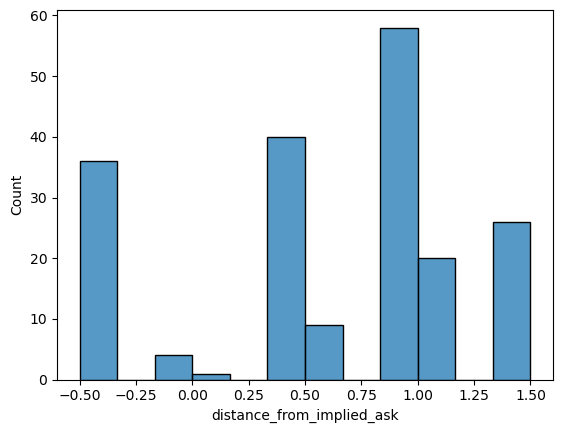

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


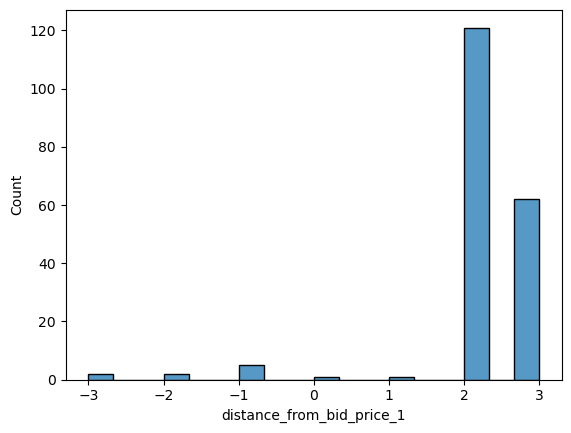

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


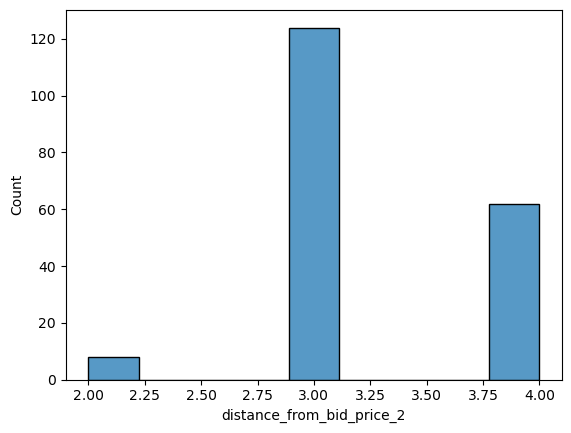

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


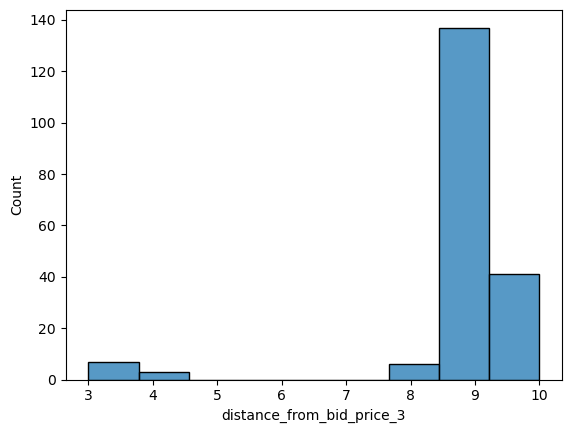

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


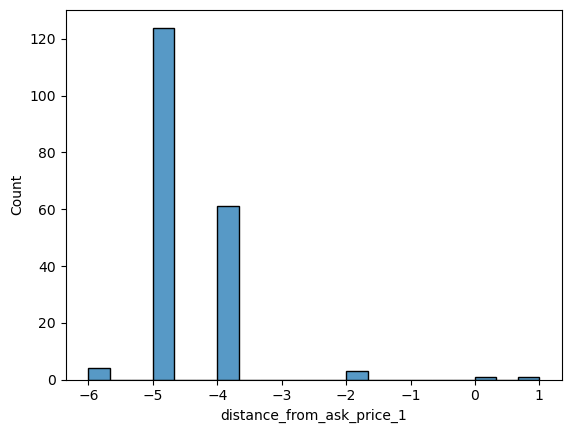

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


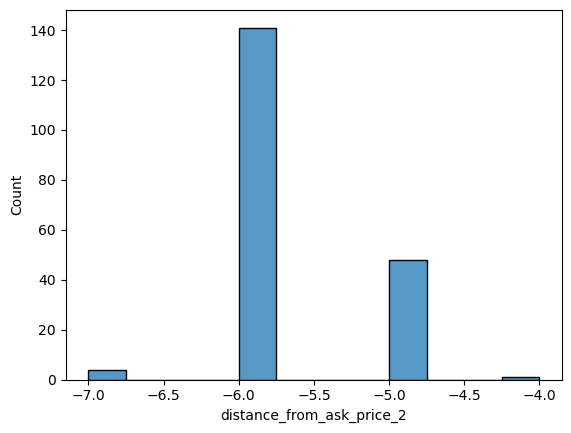

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


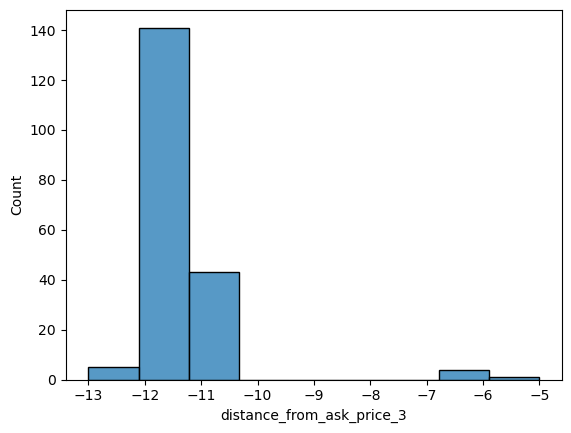

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


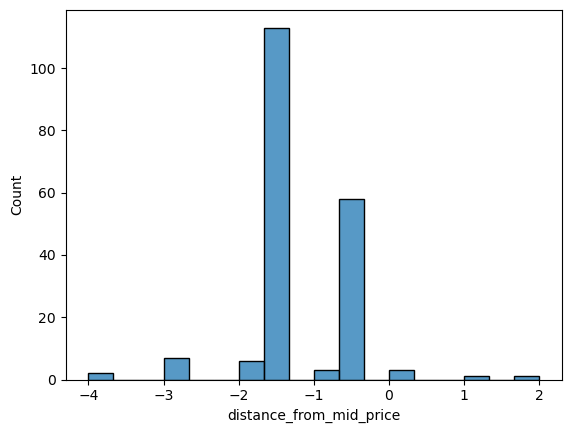

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


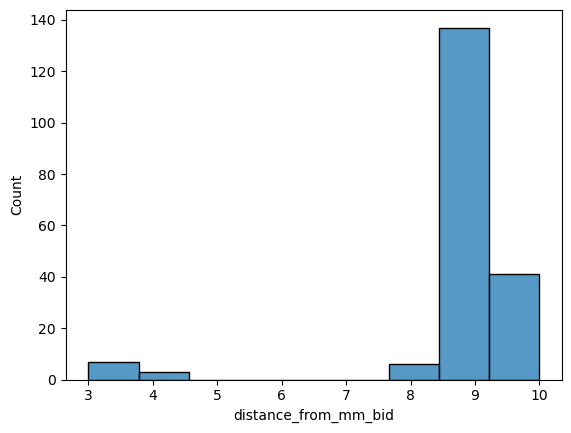

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


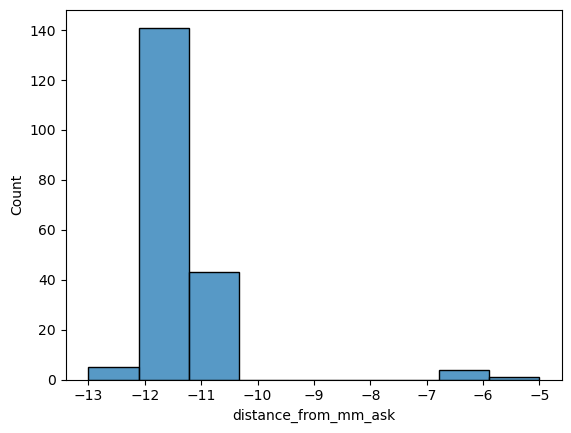

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


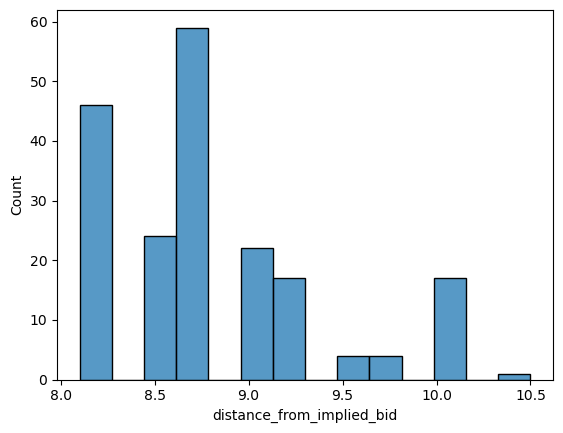

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


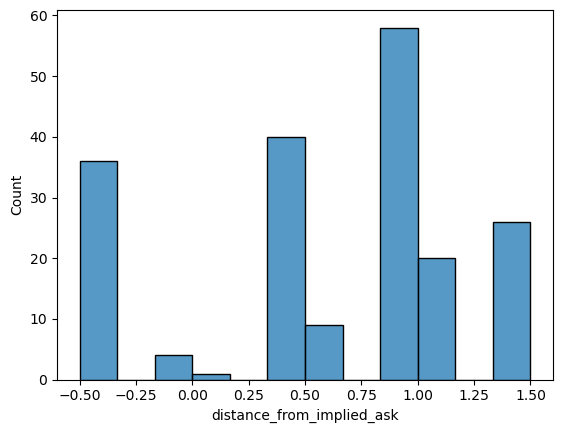

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


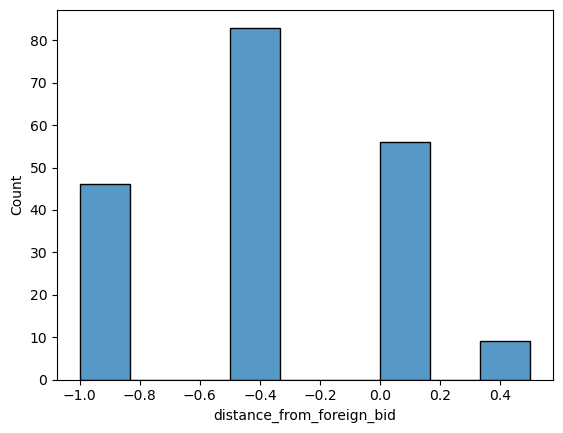

/Users/zhangjie/opt/anaconda3/envs/prosperity/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


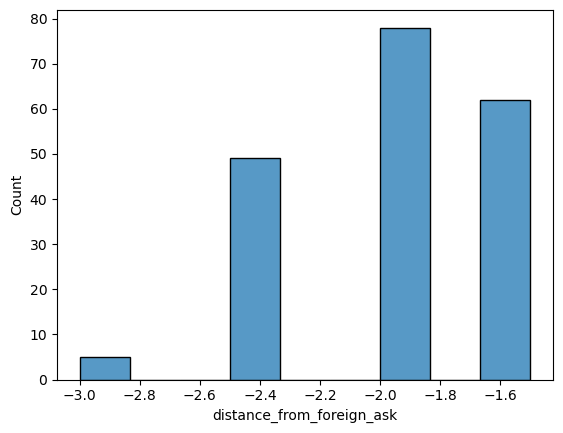

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
highest_level_df = pd.read_csv("orchids_highest_level.csv")
highest_level_df = highest_level_df.merge(df_orchids[['timestamp', 'implied_ask', 'bid_price_1', 'bid_price_2', 'bid_price_3',
       'ask_price_1', 'ask_price_2', 'ask_price_3', 'mid_price', 'mm_bid', 'mm_ask', 'implied_bid', 'foreign_bid', 'foreign_ask']], on='timestamp', how='left')
# highest_level_df.head()
highest_level_df = highest_level_df[highest_level_df['highest_level'] != 0].dropna()
highest_level_df['highest_level'] = highest_level_df['highest_level'].apply(lambda x:round(x))
import seaborn as sns
for column in ['implied_ask', 'bid_price_1', 'bid_price_2', 'bid_price_3',
       'ask_price_1', 'ask_price_2', 'ask_price_3', 'mid_price', 'mm_bid', 'mm_ask', 'implied_bid', 'implied_ask', 'foreign_bid', 'foreign_ask']:
    
    highest_level_df[f'distance_from_{column}'] = highest_level_df['highest_level'].to_numpy() - highest_level_df[column].to_numpy()
    sns.histplot(data=highest_level_df, x=f'distance_from_{column}')
    plt.show()


In [46]:
highest_level_df['implied_ask'].to_numpy()

array([[1054.5, 1054.5],
       [1054.5, 1054.5],
       [1056.5, 1056.5],
       [1070.5, 1070.5],
       [1070.5, 1070.5],
       [1068.5, 1068.5],
       [1066.5, 1066.5],
       [1068.5, 1068.5],
       [1066.5, 1066.5],
       [1074.5, 1074.5],
       [1068.4, 1068.4],
       [1060.4, 1060.4],
       [1059.4, 1059.4],
       [1058.4, 1058.4],
       [1060.4, 1060.4],
       [1055.4, 1055.4],
       [1054.4, 1054.4],
       [1058.4, 1058.4],
       [1064.4, 1064.4],
       [1066.4, 1066.4],
       [1063.4, 1063.4],
       [1060.4, 1060.4],
       [1060.4, 1060.4],
       [1060.5, 1060.5],
       [1052.5, 1052.5],
       [1052.5, 1052.5],
       [1044.5, 1044.5],
       [1046.5, 1046.5],
       [1044.5, 1044.5],
       [1036.5, 1036.5],
       [1056.5, 1056.5],
       [1052.5, 1052.5],
       [1052.5, 1052.5],
       [1056.5, 1056.5],
       [1054.5, 1054.5],
       [1058.5, 1058.5],
       [1048.5, 1048.5],
       [1048. , 1048. ],
       [1047.5, 1047.5],
       [1045. , 1045. ],
